# Detection of dogs for the images provided.

In this notebook we will be using the library imageai to detect dogs in the differents images that were provided. This is my first time using this library so it has been a great good to know about this library and its potential.

We will be showing the different images and the results that were obtained to see if out neural network is working well.

In [1]:
from imageai.Detection import ObjectDetection
import os
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


## Creation of the model with YoloV3

In [2]:
execution_path = os.getcwd()

detector = ObjectDetection()
detector.setModelTypeAsYOLOv3()
detector.setModelPath( os.path.join(execution_path , "yolo.h5"))
detector.loadModel()

custom_objects = detector.CustomObjects(dog=True)

W0916 16:34:22.091892 4561528256 deprecation_wrapper.py:119] From /anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:190: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0916 16:34:22.093009 4561528256 deprecation_wrapper.py:119] From /anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:197: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0916 16:34:22.093917 4561528256 deprecation_wrapper.py:119] From /anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:203: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

W0916 16:34:22.120847 4561528256 deprecation_wrapper.py:119] From /anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:207: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.

W0916 16:34:22.121962 4561528256 deprecation_wrapper.py:11

## Detection on each of the images

In [3]:
images = []
for i in range(0,4):
    input_path = 'dogs_' + str(i) + '.jpg'
    output_path = 'result_' + str(i) + '.jpg'

    detections = detector.detectCustomObjectsFromImage(input_image=input_path, output_image_path=output_path, custom_objects = custom_objects, minimum_percentage_probability=60)
    print("Results for image: " + str(input_path))
    for eachObject in detections:
        print(eachObject["name"] , " : ", eachObject["percentage_probability"], " : ", eachObject["box_points"] )
        print("--------------------------------")

Results for image: dogs_0.jpg
dog  :  97.12058901786804  :  [472, 316, 546, 393]
--------------------------------
dog  :  97.594553232193  :  [308, 257, 361, 389]
--------------------------------
dog  :  99.05417561531067  :  [170, 226, 298, 404]
--------------------------------
dog  :  99.63021278381348  :  [49, 216, 202, 409]
--------------------------------
dog  :  99.96480941772461  :  [371, 234, 462, 398]
--------------------------------
Results for image: dogs_1.jpg
dog  :  65.74481725692749  :  [115, 111, 225, 331]
--------------------------------
dog  :  89.37004804611206  :  [26, 26, 164, 334]
--------------------------------
dog  :  93.57099533081055  :  [373, 22, 512, 347]
--------------------------------
dog  :  96.02366089820862  :  [196, 102, 294, 346]
--------------------------------
dog  :  99.32634830474854  :  [497, 83, 625, 348]
--------------------------------
dog  :  99.61172938346863  :  [282, 95, 404, 338]
--------------------------------
Results for image: dogs_

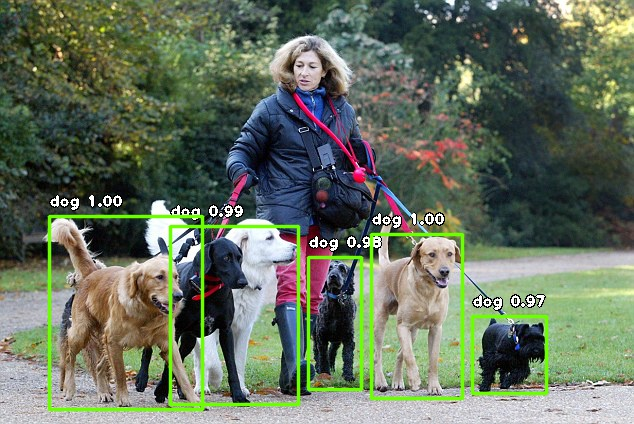

In [4]:
Image('result_0.jpg')

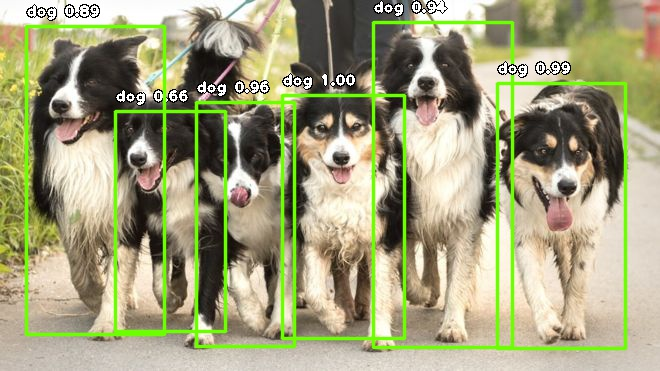

In [5]:
Image('result_1.jpg')

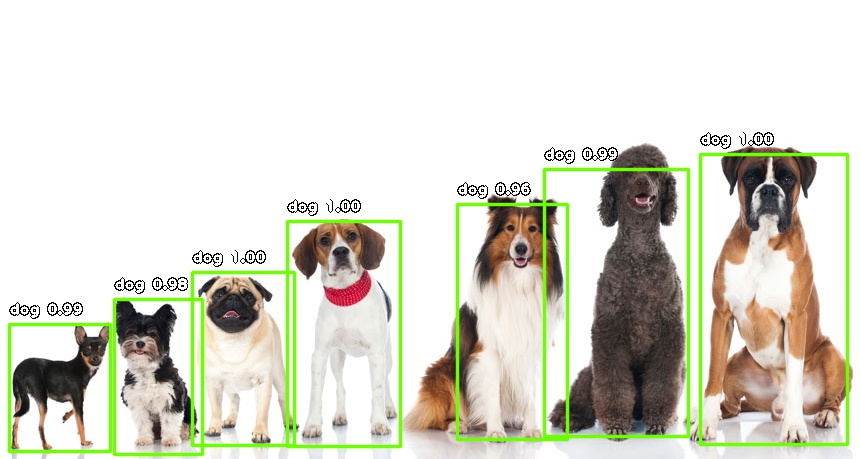

In [6]:
Image('result_2.jpg')

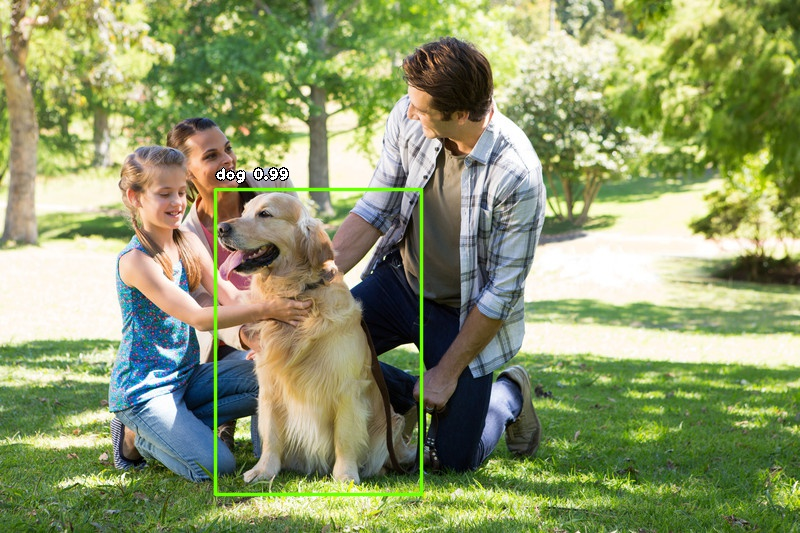

In [7]:
Image('result_3.jpg')

# Computer Vision Questions

## 1. Why did you choose this particular model?

I chose to use this model as it is my first time using detection models. I saw that imageai was a very well known library to use. I read some articles and saw that Yolo was the best model for real time detection as it is the fastest one, keeping the accuracy a little lower than other models, but bringing speed to our detection that it is what we really need. I also tried the tiny-yolo approach but it was quite bad at detecting the dogs in the pictures provided, furthermore the speed of that model was not a really big improvement for its lack of detection.

## 2. How did the model perform on the pictures provided?

As shown in the pictures above, the model detected almost all of the dogs provided. With the tiny-yolo approach it did not detect any dogs on picture 1 (I suppose that it detected them as cows). 
However, for the model that we have finally implemented (Yolo). It has detected all the dogs in the pictures with only one exception in the picture 0. Where two dogs (black and white) are detected together as a single dog. For the rest of the pictures, our model has detected all of the dogs with a great performance in their probabilities.

## 3. How do you think this model would perform in specific real life scenario where we need to detect dogs from given cameras? What are some important decisions for which to assess performance?

As far as I am concerned, as I am not a real expert in computer vision. I can imagine that the performance will also be affected by the quality of the cameras as well as the position of them in the park. Also the light will affect the performance as well, we will have to put the cameras in places that have good quality of view in all the hours of the day. Even for the night, we can try to detect the dogs if the illumination of the park is not bad or by trying to improve the light within the photos.
I suppose that a proof of concept with different cameras and different positions in the park would be necessary in order to choose the best one for this problem.

## 4. How could you improve performance (for the given dimension...) for this real life scenario?

As I said in the question above the quality and position will have a great impact in our performance. Furthermore, we can try to enhance the performance of our model doing some transformation to the images captured, trying to enhance the shapes and forms in the image, for instance a histogram equalization could be a good idea.
Another possibility is trying to overtrain some of the last layers of this model with images that correspond to our specific problem. For this purpose we will have to tag some of the phots taken by our cameras in the park and feed them to the neural network in order to train it better for this specific problem.

## 5. How could you go about modifying the system so that it can detect wether the dogs are on a leash?

I think that for this problem we can try to train the model to detect leashes, for that we will have to tag some pictures of dogs being carried by a leash and select it to detect the leash, traning the model with photos that we have tagged. As it already detects humans, we can try to check the bounding boxes of the leashes, the dog and the human. We can then check if the boxes are overlapping, other option is just checking the boxes of the dog and the leashes, but as I think that the detection of the leashes would be a great problem due to it's size, checking also the human boxes would be a better approach.